## Kaggle Titanic Predict Survival
## Dataset:  <a href = 'https://www.kaggle.com/c/titanic/data'>Titanic</a>

In [1]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

In [ ]:
# import csv files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data Explore

In [3]:
train.shape

(891, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
cols = ['Name','Ticket','Cabin']
train = train.drop(cols,axis=1)

In [6]:
train.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C
10,11,1,3,female,4.0,1,1,16.7000,S


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Visualization

## 1. Pclass and Survived

In [8]:
Pclass_pivot = train.pivot_table(index='Pclass', values = 'Survived')
Pclass_pivot

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


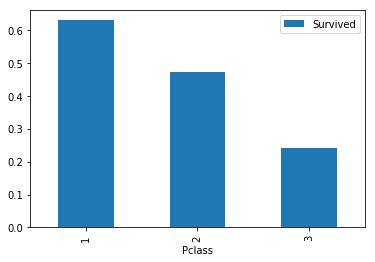

In [9]:
Pclass_pivot.plot.bar()
plt.show()

## 2. Sex and Survived

In [10]:
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot

,Survived
Sex,
female,0.742038
male,0.188908


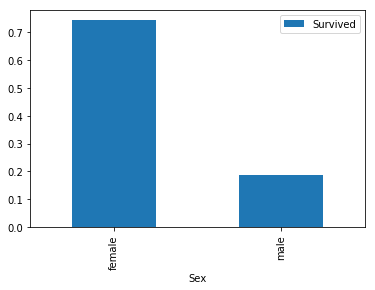

In [11]:
sex_pivot.plot.bar()
plt.show()

## 3. SibSp and Survived

In [12]:
SibSp_pivot = train.pivot_table(index="SibSp",values="Survived")
SibSp_pivot

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


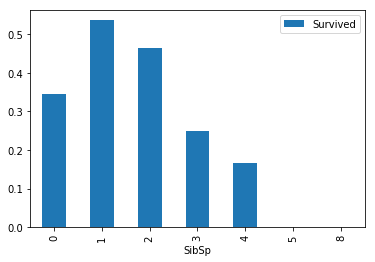

In [13]:
SibSp_pivot.plot.bar()
plt.show()

## 4. Parch and Survived

In [14]:
Parch_pivot = train.pivot_table(index="Parch",values="Survived")
Parch_pivot

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


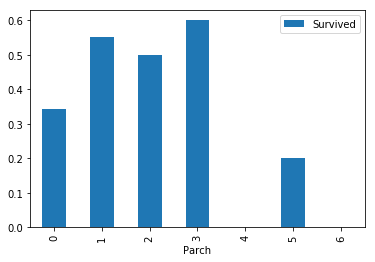

In [15]:
Parch_pivot.plot.bar()
plt.show()

## 5. Embarked and Survived

Text(0.5,1,'Embarked and Survived')

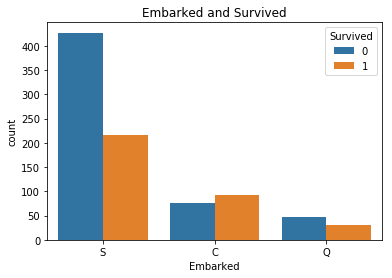

In [18]:
sns.countplot('Embarked', hue='Survived', data=train)
plt.title('Embarked and Survived')

## 6. Sex, Age and Survived

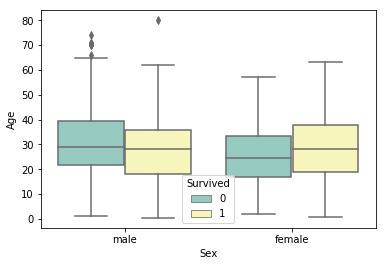

In [19]:
ax=sns.boxplot(x='Sex', y ='Age', hue='Survived', data=train,palette='Set3')

 ## Data Cleaning

In [27]:
dummies = []
cols = ['Pclass','Sex','Embarked']
for col in cols:
    dummies.append(pd.get_dummies(train[col]))

In [28]:
titanic_dummies = pd.concat(dummies, axis=1)

In [29]:
titanic_dummies.head()

,1,2,3,female,male,C,Q,S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


In [30]:
train = pd.concat((train,titanic_dummies),axis=1)

In [31]:
train


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1,...,Q,S,1,2,3,female,male,C,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,0,...,0,1,0,0,1,0,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,...,0,0,1,0,0,1,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,...,0,1,0,0,1,1,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,...,0,1,1,0,0,1,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,0,...,0,1,0,0,1,0,1,0,0,1
5,6,0,3,male,NaN,0,0,8.4583,Q,0,...,1,0,0,0,1,0,1,0,1,0
6,7,0,1,male,54.0,0,0,51.8625,S,1,...,0,1,1,0,0,0,1,0,0,1
7,8,0,3,male,2.0,3,1,21.0750,S,0,...,0,1,0,0,1,0,1,0,0,1
8,9,1,3,female,27.0,0,2,11.1333,S,0,...,0,1,0,0,1,1,0,0,0,1
9,10,1,2,female,14.0,1,0,30.0708,C,0,...,0,0,0,1,0,1,0,1,0,0


In [32]:
train = train.drop(['Pclass','Sex','Embarked'],axis=1)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 30 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
1              891 non-null uint8
2              891 non-null uint8
3              891 non-null uint8
female         891 non-null uint8
male           891 non-null uint8
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
1              891 non-null uint8
2              891 non-null uint8
3              891 non-null uint8
female         891 non-null uint8
male           891 non-null uint8
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
1              891 non-null uint8
2              891 non-null uint8
3              891 non-null uint8
female         891 non-null uint8
male   

In [38]:
train['Age'] = train['Age'].interpolate()

C:\Users\Ming\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
X = train.values
y = train['Survived'].values

In [99]:
X = np.delete(X,1,axis=1)

In [100]:
from sklearn.svm.libsvm import cross_validation
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [101]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
0.78735805970149249

0.7873580597014925

In [102]:
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit (X_train, y_train)
clf.score (X_test, y_test)
0.80970149253731338

0.8097014925373134

In [103]:
clf = ensemble.GradientBoostingClassifier()
clf.fit (X_train, y_train)
clf.score (X_test, y_test)
0.81343283582089554

0.8134328358208955

In [104]:
clf = ensemble.GradientBoostingClassifier(n_estimators=50)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.832089552238806

In [73]:
submission = pd.read_csv('gender_submission.csv')

In [ ]:
submission.to_csv('./002submission.csv', index=False)